<a href="https://colab.research.google.com/github/Souha-Kabtni/Celestial_Bodies_Detection/blob/main/Copy_of_Project_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [89]:
# Import packages
import pandas as pd
pd.set_option('display.max_columns',100)
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import set_config
set_config(transform_output='pandas')
import math

# Import modeling tools
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from imblearn.over_sampling import SMOTE
from imblearn.pipeline import make_pipeline as make_sampler_pipeline

# Import the Algorithms to be used for modeling
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier

# Import Classifcation Matrics for model evaluation
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score, classification_report, ConfusionMatrixDisplay

import warnings
warnings.filterwarnings("ignore")

In [26]:
# Upload the file
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# **⛳ Part 1:**

## This is my confirmed Dataset 🙂

In [27]:
# Read the fil with pandas
df = pd.read_csv('/content/drive/MyDrive/Coding_Dojo/Stack 2/SDSS_DR18.csv')
df.head()

,objid,specobjid,ra,dec,u,g,r,i,z,run,rerun,camcol,field,plate,mjd,fiberid,petroRad_u,petroRad_g,petroRad_i,petroRad_r,petroRad_z,petroFlux_u,petroFlux_g,petroFlux_i,petroFlux_r,petroFlux_z,petroR50_u,petroR50_g,petroR50_i,petroR50_r,petroR50_z,psfMag_u,psfMag_r,psfMag_g,psfMag_i,psfMag_z,expAB_u,expAB_g,expAB_r,expAB_i,expAB_z,redshift,class
0,1.240000e+18,3.240000e+17,184.950869,0.733068,18.87062,17.59612,17.11245,16.83899,16.70908,756,301,5,462,288,52000,456,7.282402,7.004576,6.855976,7.112749,6.930960,30.66393,95.11749,181.718400,146.991600,207.027300,3.832911,3.659077,3.486617,3.621753,3.606744,21.11891,19.50324,19.96352,19.25145,19.05230,0.479021,0.518483,0.520474,0.508502,0.488969,0.041691,GALAXY
1,1.240000e+18,3.250000e+17,185.729201,0.679704,19.59560,19.92153,20.34448,20.66213,20.59599,756,301,5,467,289,51990,322,1.335305,1.321027,1.167182,1.266144,0.966431,14.55308,10.33474,4.623398,7.371214,4.824737,0.653159,0.659008,0.536881,0.650679,0.538456,19.58945,20.34491,19.92417,20.65535,20.57387,0.573926,0.531728,0.403072,0.999874,0.189495,-0.000814,STAR
2,1.240000e+18,3.240000e+17,185.687690,0.823480,19.26421,17.87891,17.09593,16.65159,16.35329,756,301,5,467,288,52000,614,3.874802,3.952013,4.007457,4.057646,3.818449,19.31011,72.75911,220.896700,148.093400,278.021100,1.898399,1.993737,1.944997,1.968584,1.863368,20.82290,18.54832,19.33645,18.16669,17.78844,0.701666,0.743386,0.770897,0.778642,0.736771,0.113069,GALAXY
3,1.240000e+18,2.880000e+18,185.677904,0.768362,19.49739,17.96166,17.41269,17.20545,17.11567,756,301,5,467,2558,54140,414,1.251496,1.325716,1.176959,1.281164,1.199375,15.33828,62.74539,125.370700,104.867200,134.623300,0.633329,0.679328,0.611904,0.657945,0.622971,19.49706,17.42272,17.96176,17.21564,17.12367,0.999818,0.787760,0.745611,0.399718,0.986137,0.000087,STAR
4,1.240000e+18,2.880000e+18,185.814763,0.776940,18.31519,16.83033,16.26352,16.06320,15.97527,756,301,5,467,2558,54140,403,1.365736,1.336521,1.161740,1.266766,1.239413,45.91689,178.20720,359.093500,300.775600,388.320300,0.677250,0.680561,0.613476,0.655520,0.640669,18.33505,16.28580,16.85104,16.08275,15.98694,0.999795,0.834450,0.723526,0.712259,0.527055,0.000018,STAR


## **Data Dictionary**

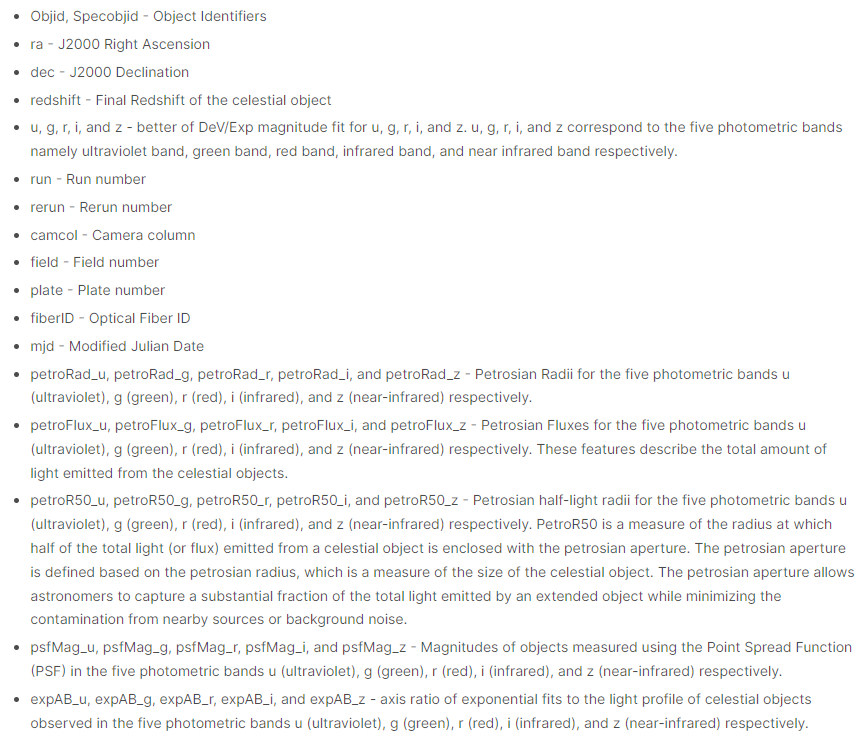

### **1. Source of data:**

 + **Kaggle** using this link: https://www.kaggle.com/datasets/diraf0/sloan-digital-sky-survey-dr18 (The link also provides a detailed description of each Feature used in the dataset which will be refered to as my Data Dictionary)

### **2. Brief description of data:**

 + This dataset consists of 100,000 observations from the Data Release (DR) 18 of the Sloan Digital Sky Survey (SDSS). Each observation is described by 42 features and 1 class column classifying the observation as either a Star, Galaxy or Quasar (Taken from Kaggle).

### **3. What is the target?**

 + Class column that classifies stars, galaxies, and quasars based on their spectral characteristics

### **4. What does one row represent?**(A person? A business? An event? A product?)

 + Each row represents an event (the spectral characteristics of the observation).

### **5. Is this a classification or regression problem?**

 + It is a classification problem.

### **6. How many features does the data have?**

 + There are 42 features.

### **7. How many rows are in the dataset?**

 + There are 100,000 rows.

### **8. What, if any, challenges do you foresee in cleaning, exploring, or modeling this dataset?**

 + The data seems to be cleaned. However that are a couple of problems that I might face:

# **⛳ Part 2:**

In [28]:
# General Look at the data
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 43 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   objid        100000 non-null  float64
 1   specobjid    100000 non-null  float64
 2   ra           100000 non-null  float64
 3   dec          100000 non-null  float64
 4   u            100000 non-null  float64
 5   g            100000 non-null  float64
 6   r            100000 non-null  float64
 7   i            100000 non-null  float64
 8   z            100000 non-null  float64
 9   run          100000 non-null  int64  
 10  rerun        100000 non-null  int64  
 11  camcol       100000 non-null  int64  
 12  field        100000 non-null  int64  
 13  plate        100000 non-null  int64  
 14  mjd          100000 non-null  int64  
 15  fiberid      100000 non-null  int64  
 16  petroRad_u   100000 non-null  float64
 17  petroRad_g   100000 non-null  float64
 18  petroRad_i   100000 non-n

,objid,specobjid,ra,dec,u,g,r,i,z,run,rerun,camcol,field,plate,mjd,fiberid,petroRad_u,petroRad_g,petroRad_i,petroRad_r,petroRad_z,petroFlux_u,petroFlux_g,petroFlux_i,petroFlux_r,petroFlux_z,petroR50_u,petroR50_g,petroR50_i,petroR50_r,petroR50_z,psfMag_u,psfMag_r,psfMag_g,psfMag_i,psfMag_z,expAB_u,expAB_g,expAB_r,expAB_i,expAB_z,redshift,class
0,1.240000e+18,3.240000e+17,184.950869,0.733068,18.87062,17.59612,17.11245,16.83899,16.70908,756,301,5,462,288,52000,456,7.282402,7.004576,6.855976,7.112749,6.930960,30.66393,95.11749,181.718400,146.991600,207.027300,3.832911,3.659077,3.486617,3.621753,3.606744,21.11891,19.50324,19.96352,19.25145,19.05230,0.479021,0.518483,0.520474,0.508502,0.488969,0.041691,GALAXY
1,1.240000e+18,3.250000e+17,185.729201,0.679704,19.59560,19.92153,20.34448,20.66213,20.59599,756,301,5,467,289,51990,322,1.335305,1.321027,1.167182,1.266144,0.966431,14.55308,10.33474,4.623398,7.371214,4.824737,0.653159,0.659008,0.536881,0.650679,0.538456,19.58945,20.34491,19.92417,20.65535,20.57387,0.573926,0.531728,0.403072,0.999874,0.189495,-0.000814,STAR
2,1.240000e+18,3.240000e+17,185.687690,0.823480,19.26421,17.87891,17.09593,16.65159,16.35329,756,301,5,467,288,52000,614,3.874802,3.952013,4.007457,4.057646,3.818449,19.31011,72.75911,220.896700,148.093400,278.021100,1.898399,1.993737,1.944997,1.968584,1.863368,20.82290,18.54832,19.33645,18.16669,17.78844,0.701666,0.743386,0.770897,0.778642,0.736771,0.113069,GALAXY
3,1.240000e+18,2.880000e+18,185.677904,0.768362,19.49739,17.96166,17.41269,17.20545,17.11567,756,301,5,467,2558,54140,414,1.251496,1.325716,1.176959,1.281164,1.199375,15.33828,62.74539,125.370700,104.867200,134.623300,0.633329,0.679328,0.611904,0.657945,0.622971,19.49706,17.42272,17.96176,17.21564,17.12367,0.999818,0.787760,0.745611,0.399718,0.986137,0.000087,STAR
4,1.240000e+18,2.880000e+18,185.814763,0.776940,18.31519,16.83033,16.26352,16.06320,15.97527,756,301,5,467,2558,54140,403,1.365736,1.336521,1.161740,1.266766,1.239413,45.91689,178.20720,359.093500,300.775600,388.320300,0.677250,0.680561,0.613476,0.655520,0.640669,18.33505,16.28580,16.85104,16.08275,15.98694,0.999795,0.834450,0.723526,0.712259,0.527055,0.000018,STAR


# **DATA CLEANING** 🤖

###➿ **Let's examine the dimensions of the data**

In [29]:
print(df.shape)
print("Number of rows: "+str(df.shape[0]))
print("Number of columns: "+str(df.shape[1]))

(100000, 43)
Number of rows: 100000
Number of columns: 43


###Given that I am interested in predicting the Class column that classifies stars, galaxies, and quasars based on their spectral characteristics,


###➿ **Let's analyse which features/columns to preserve and which to eliminate**

### In keeping with the Data Dictionary, these columns are to be dropped from the dataset for the below reasons:

+ **objid and specobjid are just identifiers for accessing the rows back when they were stored in the original database. Therefore we will not need them for classification as they are not related to the outcome.**

+ **The features ‘run’, ‘rerun’, ‘camcol’ and ‘field’ are values which describe parts of the camera at the moment when making the observation, e.g. ‘run’ represents the corresponding scan which captured the object.**

+ **The features 'plate' number and 'fiberID' refer to the number of the plate and the ID of the optical fiber responsible for gathering light from the celestial object respectively.**

+ **The feature 'mjd' is represents the number of days that have passed since midnight Nov. 17, 1858 and used in SDSS to keep track of the time of each observation**

In [30]:
column_drop = ['objid', 'specobjid', 'run', 'rerun', 'camcol', 'field', 'plate', 'mjd', 'fiberid']
df = df.drop(column_drop, axis=1)
print(df.shape)
print("Number of rows: "+str(df.shape[0]))
print("Number of columns: "+str(df.shape[1]))

(100000, 34)
Number of rows: 100000
Number of columns: 34


In [31]:
# Let us examine our new data :)

df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 34 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   ra           100000 non-null  float64
 1   dec          100000 non-null  float64
 2   u            100000 non-null  float64
 3   g            100000 non-null  float64
 4   r            100000 non-null  float64
 5   i            100000 non-null  float64
 6   z            100000 non-null  float64
 7   petroRad_u   100000 non-null  float64
 8   petroRad_g   100000 non-null  float64
 9   petroRad_i   100000 non-null  float64
 10  petroRad_r   100000 non-null  float64
 11  petroRad_z   100000 non-null  float64
 12  petroFlux_u  100000 non-null  float64
 13  petroFlux_g  100000 non-null  float64
 14  petroFlux_i  100000 non-null  float64
 15  petroFlux_r  100000 non-null  float64
 16  petroFlux_z  100000 non-null  float64
 17  petroR50_u   100000 non-null  float64
 18  petroR50_g   100000 non-n

,ra,dec,u,g,r,i,z,petroRad_u,petroRad_g,petroRad_i,petroRad_r,petroRad_z,petroFlux_u,petroFlux_g,petroFlux_i,petroFlux_r,petroFlux_z,petroR50_u,petroR50_g,petroR50_i,petroR50_r,petroR50_z,psfMag_u,psfMag_r,psfMag_g,psfMag_i,psfMag_z,expAB_u,expAB_g,expAB_r,expAB_i,expAB_z,redshift,class
0,184.950869,0.733068,18.87062,17.59612,17.11245,16.83899,16.70908,7.282402,7.004576,6.855976,7.112749,6.930960,30.66393,95.11749,181.718400,146.991600,207.027300,3.832911,3.659077,3.486617,3.621753,3.606744,21.11891,19.50324,19.96352,19.25145,19.05230,0.479021,0.518483,0.520474,0.508502,0.488969,0.041691,GALAXY
1,185.729201,0.679704,19.59560,19.92153,20.34448,20.66213,20.59599,1.335305,1.321027,1.167182,1.266144,0.966431,14.55308,10.33474,4.623398,7.371214,4.824737,0.653159,0.659008,0.536881,0.650679,0.538456,19.58945,20.34491,19.92417,20.65535,20.57387,0.573926,0.531728,0.403072,0.999874,0.189495,-0.000814,STAR
2,185.687690,0.823480,19.26421,17.87891,17.09593,16.65159,16.35329,3.874802,3.952013,4.007457,4.057646,3.818449,19.31011,72.75911,220.896700,148.093400,278.021100,1.898399,1.993737,1.944997,1.968584,1.863368,20.82290,18.54832,19.33645,18.16669,17.78844,0.701666,0.743386,0.770897,0.778642,0.736771,0.113069,GALAXY
3,185.677904,0.768362,19.49739,17.96166,17.41269,17.20545,17.11567,1.251496,1.325716,1.176959,1.281164,1.199375,15.33828,62.74539,125.370700,104.867200,134.623300,0.633329,0.679328,0.611904,0.657945,0.622971,19.49706,17.42272,17.96176,17.21564,17.12367,0.999818,0.787760,0.745611,0.399718,0.986137,0.000087,STAR
4,185.814763,0.776940,18.31519,16.83033,16.26352,16.06320,15.97527,1.365736,1.336521,1.161740,1.266766,1.239413,45.91689,178.20720,359.093500,300.775600,388.320300,0.677250,0.680561,0.613476,0.655520,0.640669,18.33505,16.28580,16.85104,16.08275,15.98694,0.999795,0.834450,0.723526,0.712259,0.527055,0.000018,STAR


###➿ **Let's identify any Class Imbalance**

In [32]:
# This is how distributed my Target variable values are

df['class'].value_counts(normalize=True)

GALAXY    0.52343
STAR      0.37232
QSO       0.10425
Name: class, dtype: float64

# ❌🤔 I will have to deal with my imbalanced classes after the split with SMOTE

###➿ **Let's explore the data**

In [35]:
print('Duplicates:', df.duplicated().sum())

Duplicates: 0


### ✅ We have no duplicate rows to address :)

###➿ **Let's prepare/clean the data for exploratory analysis purposes**

In [36]:
# This code is used to display all my columns with missing values
for col in df.columns:
    print('Column {} has {} missing values'.format(col,df[col].isnull().sum()))

Column ra has 0 missing values
Column dec has 0 missing values
Column u has 0 missing values
Column g has 0 missing values
Column r has 0 missing values
Column i has 0 missing values
Column z has 0 missing values
Column petroRad_u has 0 missing values
Column petroRad_g has 0 missing values
Column petroRad_i has 0 missing values
Column petroRad_r has 0 missing values
Column petroRad_z has 0 missing values
Column petroFlux_u has 0 missing values
Column petroFlux_g has 0 missing values
Column petroFlux_i has 0 missing values
Column petroFlux_r has 0 missing values
Column petroFlux_z has 0 missing values
Column petroR50_u has 0 missing values
Column petroR50_g has 0 missing values
Column petroR50_i has 0 missing values
Column petroR50_r has 0 missing values
Column petroR50_z has 0 missing values
Column psfMag_u has 0 missing values
Column psfMag_r has 0 missing values
Column psfMag_g has 0 missing values
Column psfMag_i has 0 missing values
Column psfMag_z has 0 missing values
Column expAB

### ✅ We have no missing values to address :)

###➿ **Let's ensure data types match the data types listed in the data dictionary**

In [37]:
for col in df.columns:
    print('Column {} type is {}'.format(col,df[col].dtype))

Column ra type is float64
Column dec type is float64
Column u type is float64
Column g type is float64
Column r type is float64
Column i type is float64
Column z type is float64
Column petroRad_u type is float64
Column petroRad_g type is float64
Column petroRad_i type is float64
Column petroRad_r type is float64
Column petroRad_z type is float64
Column petroFlux_u type is float64
Column petroFlux_g type is float64
Column petroFlux_i type is float64
Column petroFlux_r type is float64
Column petroFlux_z type is float64
Column petroR50_u type is float64
Column petroR50_g type is float64
Column petroR50_i type is float64
Column petroR50_r type is float64
Column petroR50_z type is float64
Column psfMag_u type is float64
Column psfMag_r type is float64
Column psfMag_g type is float64
Column psfMag_i type is float64
Column psfMag_z type is float64
Column expAB_u type is float64
Column expAB_g type is float64
Column expAB_r type is float64
Column expAB_i type is float64
Column expAB_z type is 

### ✅ All dtypes are consistent with the data dictinory and make sense :)

###➿ **Let's identify and address any inconsistencies in data for categorical values**

In [51]:
# Let us display our categorical values
df_categorical = df.dtypes == 'object'
df_categorical

ra             False
dec            False
u              False
g              False
r              False
i              False
z              False
petroRad_u     False
petroRad_g     False
petroRad_i     False
petroRad_r     False
petroRad_z     False
petroFlux_u    False
petroFlux_g    False
petroFlux_i    False
petroFlux_r    False
petroFlux_z    False
petroR50_u     False
petroR50_g     False
petroR50_i     False
petroR50_r     False
petroR50_z     False
psfMag_u       False
psfMag_r       False
psfMag_g       False
psfMag_i       False
psfMag_z       False
expAB_u        False
expAB_g        False
expAB_r        False
expAB_i        False
expAB_z        False
redshift       False
class           True
dtype: bool

### ✅ We only have class as our categorcial variables that have already examined on a previous code in which we have not witnessed any inconsistancies to address.

###➿ **Let's identify and address any impossible values**

In [50]:
# Let us display our numeric values of type float (from .info(), we have no int type values)
df_categorical = df.dtypes == 'float'
df_categorical

ra              True
dec             True
u               True
g               True
r               True
i               True
z               True
petroRad_u      True
petroRad_g      True
petroRad_i      True
petroRad_r      True
petroRad_z      True
petroFlux_u     True
petroFlux_g     True
petroFlux_i     True
petroFlux_r     True
petroFlux_z     True
petroR50_u      True
petroR50_g      True
petroR50_i      True
petroR50_r      True
petroR50_z      True
psfMag_u        True
psfMag_r        True
psfMag_g        True
psfMag_i        True
psfMag_z        True
expAB_u         True
expAB_g         True
expAB_r         True
expAB_i         True
expAB_z         True
redshift        True
class          False
dtype: bool

In [46]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
ra,100000.0,168.856657,83.844216,0.003092,128.879582,168.079889,214.554569,359.996095
dec,100000.0,17.832739,26.344079,-11.252825,-0.537780,2.899490,46.911371,68.731483
u,100000.0,18.641137,0.829035,11.726470,18.214315,18.878005,19.275750,19.599990
g,100000.0,17.407088,0.974683,11.696170,16.853340,17.520310,18.052460,19.977270
r,100000.0,16.878550,1.118858,11.277090,16.194763,16.896065,17.565593,31.698160
i,100000.0,16.517137,31.694636,-9999.000000,15.861995,16.594740,17.310102,30.980870
z,100000.0,16.154837,54.871034,-9999.000000,15.620268,16.419040,17.193873,28.668700
petroRad_u,100000.0,6.497004,13.134345,0.031018,1.580248,3.473864,7.470103,258.518600
petroRad_g,100000.0,4.678636,5.080707,0.072805,1.483575,3.336594,6.570969,258.409800
petroRad_i,100000.0,4.458623,5.189891,0.057369,1.301338,3.349003,6.196268,258.453600


### ✅ Having examined, mainly the min and max values for each float-type-value, to the data dictionary's meaning plus a small research on the internet, all values seem to be in conformity with what is expected.

## 💡 In a nutshell, having addressed unneeded features to help predict my Target Variable, the data has 10000 observations with 34 variables. All variables have numeric data except class. The class variable has character data type. And there is no missing datas in our data. Among them, almost around 50 percent (52343) rows are classified as galaxies, 37232 rows are classified as stars and only 10425 rows as quasars.

# **⛳ Part 3:**

# **EDA** 🤖

In [52]:
df.columns.values

array(['ra', 'dec', 'u', 'g', 'r', 'i', 'z', 'petroRad_u', 'petroRad_g',
       'petroRad_i', 'petroRad_r', 'petroRad_z', 'petroFlux_u',
       'petroFlux_g', 'petroFlux_i', 'petroFlux_r', 'petroFlux_z',
       'petroR50_u', 'petroR50_g', 'petroR50_i', 'petroR50_r',
       'petroR50_z', 'psfMag_u', 'psfMag_r', 'psfMag_g', 'psfMag_i',
       'psfMag_z', 'expAB_u', 'expAB_g', 'expAB_r', 'expAB_i', 'expAB_z',
       'redshift', 'class'], dtype=object)

In [56]:
columns = ['ra', 'dec', 'u', 'g', 'r', 'i', 'z', 'petroRad_u', 'petroRad_g',
       'petroRad_i', 'petroRad_r', 'petroRad_z', 'petroFlux_u',
       'petroFlux_g', 'petroFlux_i', 'petroFlux_r', 'petroFlux_z',
       'petroR50_u', 'petroR50_g', 'petroR50_i', 'petroR50_r',
       'petroR50_z', 'psfMag_u', 'psfMag_r', 'psfMag_g', 'psfMag_i',
       'psfMag_z', 'expAB_u', 'expAB_g', 'expAB_r', 'expAB_i', 'expAB_z',
       'redshift', 'class']

### 🤔 I am going to replace my categorical Target variable into a numerical column to be processed during the Modeling phase

In [58]:
df['class'].replace({'GALAXY': 0,
                     'STAR': 1,
                     'QSO': 2,},inplace=True)

df['class'].value_counts(normalize=True)

0    0.52343
1    0.37232
2    0.10425
Name: class, dtype: float64

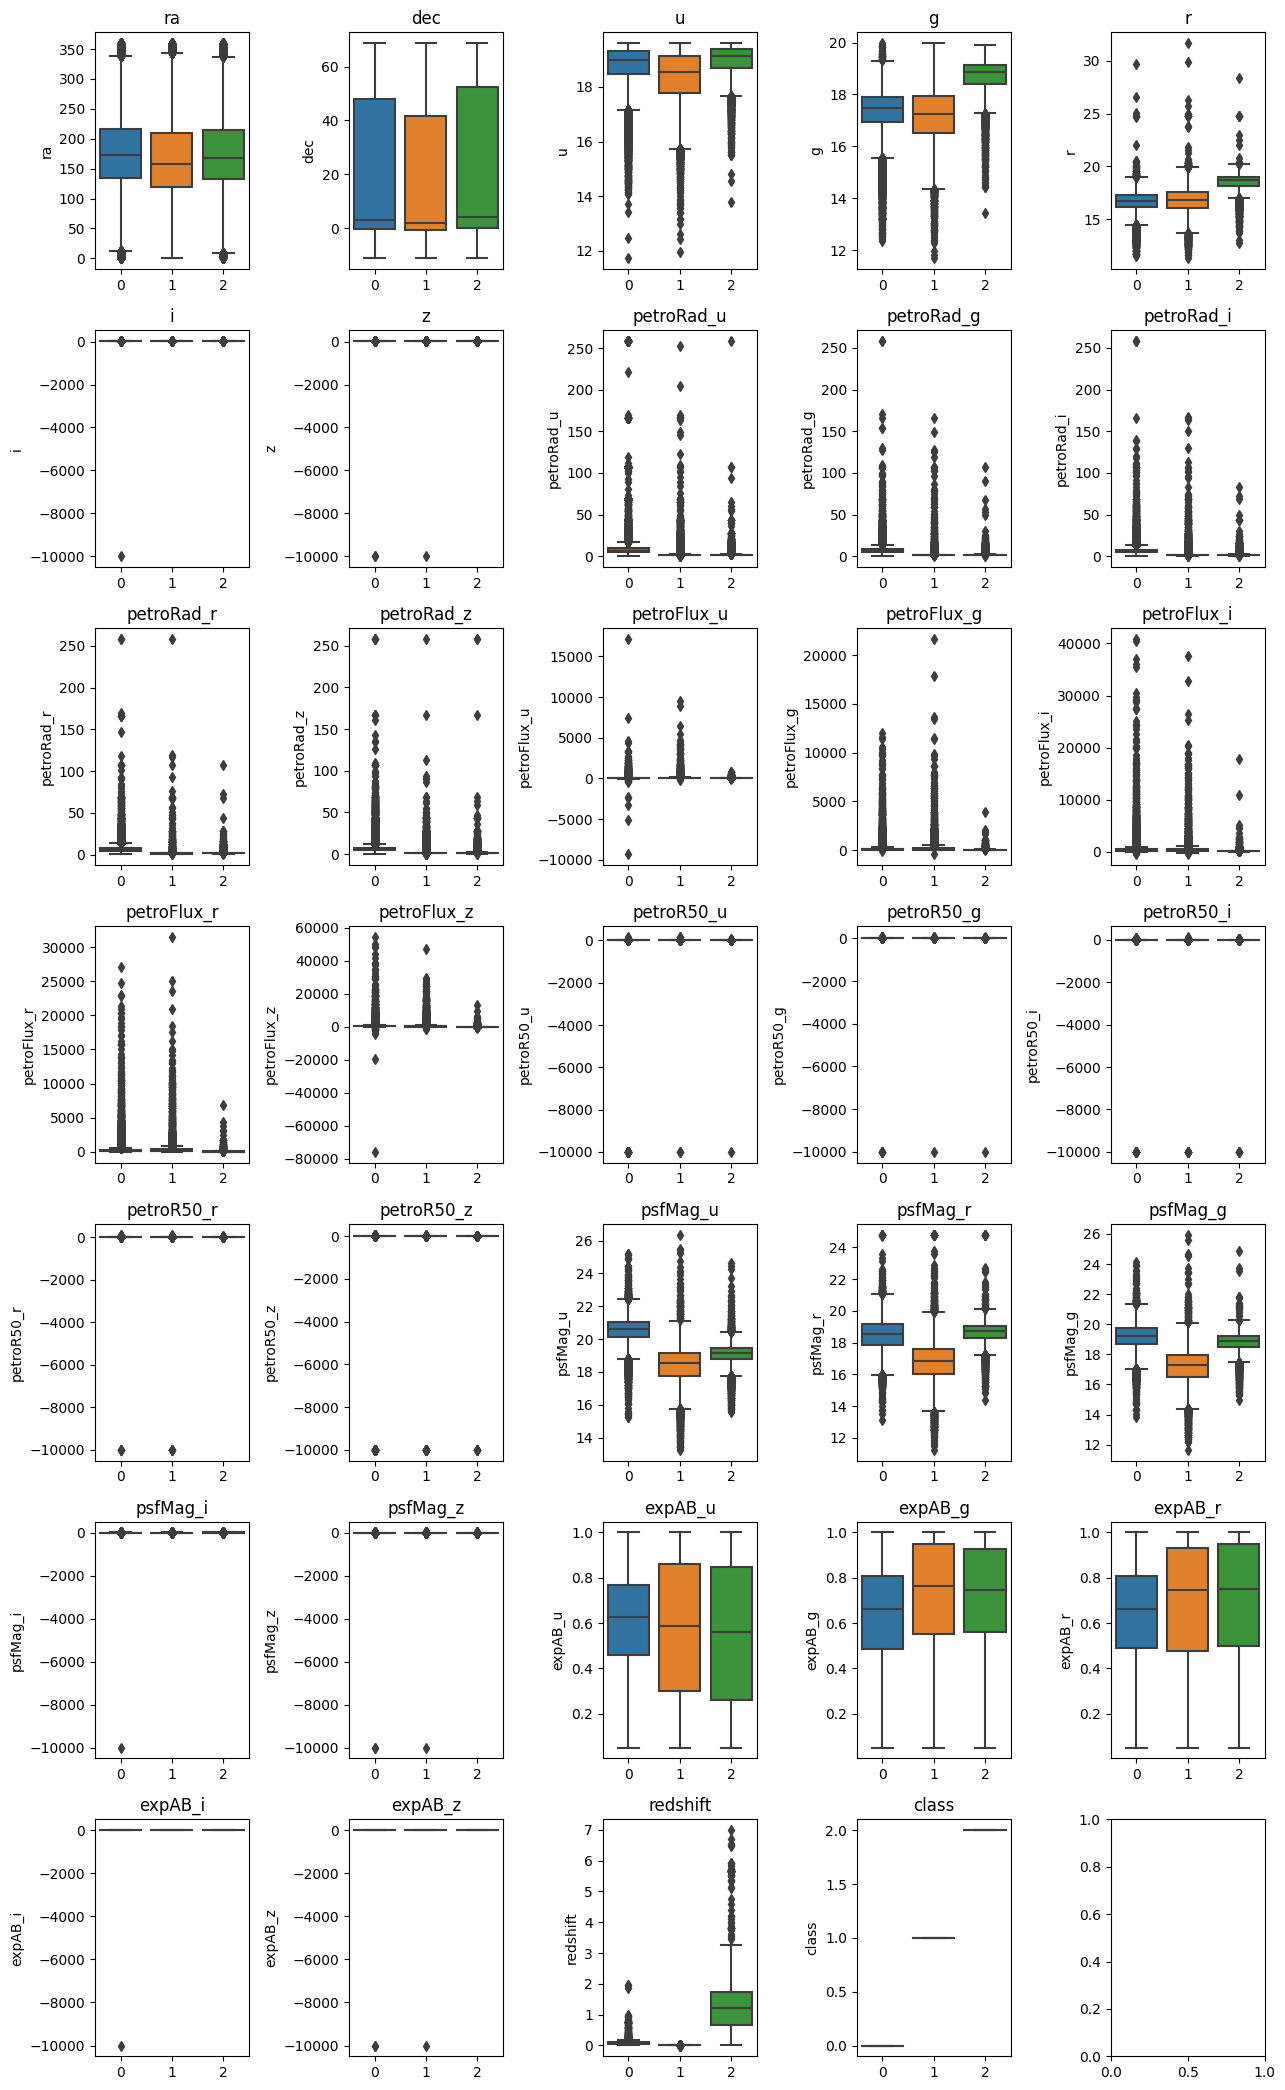

In [61]:
# Assuming 'columns' is a list of column names and 'data' is your DataFrame

num_columns = len(columns)
num_rows = math.ceil(num_columns / 5)

# Create a grid of subplots with a flexible number of rows
fig, axs = plt.subplots(num_rows, 5, figsize=(13, 3* num_rows))

# Flatten the axs array for easier indexing
axs = axs.flatten()

for i, column in enumerate(columns):
    if i < num_columns:
        # Select the appropriate subplot
        ax = axs[i]

        # Create a boxplot in the selected subplot
        sns.boxplot(x=df['class'], y=df[column], ax=ax)
        ax.set_title(column)
        ax.set_ylabel(column)

        # Remove x-label for better layout
        ax.set_xlabel('')
    else:
        # Hide any excess subplots
        fig.delaxes(axs[i])

# Adjust layout and display the plot
plt.tight_layout()
plt.show()

## Identifying any moderate or strong correlations between your target and your features and/or between one feature and another using a correlation heatmap

In [ ]:
plt.figure(figsize=(20,20))
sns.heatmap(df.corr().round(2),cmap='BuPu', annot=True);

Using a correlation heatmap, one can deduce the following:
1. Both Redshift and our target veriable 'class' are modertly correlated with a correlation coefficient of 0.53. This is an expected result since

2.

## Creating multivariate (multiple variables) exploratory visualizations to understand your data and search for trends

In [ ]:
# Histogram of Redshift and our target variable class



In [ ]:
# Lineplot of different optical filters (u, g, r, i, z) and our target variable class



# **⛳ Part 4:**

# **MODELING** 🤖

### We have already identified class imbalance with: 50 percent (52343) rows classified as galaxies, 37232 rows are classified as stars and only 10425 rows as quasars.

### 💡 This will be addressed using SMOTE.

### 😎 For the sake of demonstrating the effects of Both SMOTE, Model Tuning, as well as PCA, I will be creating the default models then apply each of these steps.

In [62]:
#Check class balance
df['class'].value_counts(normalize=True)

0    0.52343
1    0.37232
2    0.10425
Name: class, dtype: float64

In [63]:
#Train test split
X = df.drop(columns=['class'])
y = df['class']
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [64]:
display(X.head())
display(y.head())

,ra,dec,u,g,r,i,z,petroRad_u,petroRad_g,petroRad_i,petroRad_r,petroRad_z,petroFlux_u,petroFlux_g,petroFlux_i,petroFlux_r,petroFlux_z,petroR50_u,petroR50_g,petroR50_i,petroR50_r,petroR50_z,psfMag_u,psfMag_r,psfMag_g,psfMag_i,psfMag_z,expAB_u,expAB_g,expAB_r,expAB_i,expAB_z,redshift
0,184.950869,0.733068,18.87062,17.59612,17.11245,16.83899,16.70908,7.282402,7.004576,6.855976,7.112749,6.930960,30.66393,95.11749,181.718400,146.991600,207.027300,3.832911,3.659077,3.486617,3.621753,3.606744,21.11891,19.50324,19.96352,19.25145,19.05230,0.479021,0.518483,0.520474,0.508502,0.488969,0.041691
1,185.729201,0.679704,19.59560,19.92153,20.34448,20.66213,20.59599,1.335305,1.321027,1.167182,1.266144,0.966431,14.55308,10.33474,4.623398,7.371214,4.824737,0.653159,0.659008,0.536881,0.650679,0.538456,19.58945,20.34491,19.92417,20.65535,20.57387,0.573926,0.531728,0.403072,0.999874,0.189495,-0.000814
2,185.687690,0.823480,19.26421,17.87891,17.09593,16.65159,16.35329,3.874802,3.952013,4.007457,4.057646,3.818449,19.31011,72.75911,220.896700,148.093400,278.021100,1.898399,1.993737,1.944997,1.968584,1.863368,20.82290,18.54832,19.33645,18.16669,17.78844,0.701666,0.743386,0.770897,0.778642,0.736771,0.113069
3,185.677904,0.768362,19.49739,17.96166,17.41269,17.20545,17.11567,1.251496,1.325716,1.176959,1.281164,1.199375,15.33828,62.74539,125.370700,104.867200,134.623300,0.633329,0.679328,0.611904,0.657945,0.622971,19.49706,17.42272,17.96176,17.21564,17.12367,0.999818,0.787760,0.745611,0.399718,0.986137,0.000087
4,185.814763,0.776940,18.31519,16.83033,16.26352,16.06320,15.97527,1.365736,1.336521,1.161740,1.266766,1.239413,45.91689,178.20720,359.093500,300.775600,388.320300,0.677250,0.680561,0.613476,0.655520,0.640669,18.33505,16.28580,16.85104,16.08275,15.98694,0.999795,0.834450,0.723526,0.712259,0.527055,0.000018


0    0
1    1
2    0
3    1
4    1
Name: class, dtype: int64

In [83]:
def evaluate_classification(y_true, y_pred, name='model', average = 'macro'):
  scores = pd.DataFrame(index=['Accuracy','Recall','Precision', 'F1'],
                        columns=[name])
  scores.loc['Accuracy', name] = accuracy_score(y_true, y_pred).round(3)
  scores.loc['Recall', name] = recall_score(y_true, y_pred, average = 'macro').round(3)
  scores.loc['Precision', name] = precision_score(y_true, y_pred, average = 'macro').round(3)
  scores.loc['F1', name] = f1_score(y_true, y_pred, average = 'macro').round(3)
  return scores

# 🥉 **Modeling using k-nearest neighbors (KNN) Algorithm (Default)**

In [74]:
%%time

# Create amy 1st Default model pipeline using KNN algorithm
knn = KNeighborsClassifier()
scaler = StandardScaler()
knn_pipe = make_pipeline(scaler, knn)

#Fit and evaluate the baseline model pipeline

knn_pipe.fit(X_train, y_train)
train_preds_K = knn_pipe.predict(X_train)
test_preds_K = knn_pipe.predict(X_test)

# I would like to display the values of my default model's key hyperparameters to be tuned later on :)
# These values will help direct my choice of the ranges to put in GridsearchCV for tuning

print(f'- What is the number of neighbors used: {knn.n_neighbors}' '\n')
print(f'- What is the power parameter for the Minkowski metric used: {knn.p}' '\n')
print(f'- What is the weight used: {knn.weights}' '\n')

# Evaluate the model
train_K_scores = evaluate_classification(y_train, train_preds_K, name='train')
test_K_scores = evaluate_classification(y_test, test_preds_K, name='test')

pd.concat([train_K_scores, test_K_scores], axis=1)

- What is the number of neighbors used: 5

- What is the power parameter for the Minkowski metric used: 2

- What is the weight used: uniform

CPU times: user 1min 28s, sys: 107 ms, total: 1min 28s
Wall time: 1min 9s


,train,test
Accuracy,0.986,0.982
Recall,0.97,0.963
Precision,0.987,0.983
F1,0.978,0.972


              precision    recall  f1-score   support

           0       0.98      0.99      0.99     12989
           1       0.98      0.99      0.99      9385
           2       0.98      0.91      0.94      2626

    accuracy                           0.98     25000
   macro avg       0.98      0.96      0.97     25000
weighted avg       0.98      0.98      0.98     25000



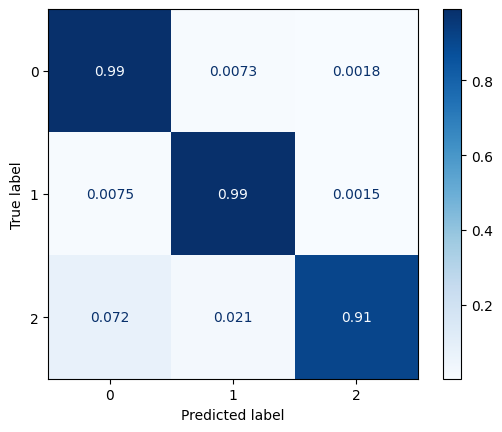

In [76]:
print(classification_report(y_test, test_preds_K))
ConfusionMatrixDisplay.from_predictions(y_test, test_preds_K, normalize='true', cmap='Blues');

# 🥈 **SMOTE on my KNN model**
**This step is performed for, potentially, better results as SMOTE is to minimize the impact caused by our imbalanced clases**

In [78]:
%%time

#Create model pipeline with scaler, SMOTE, and model
smote = SMOTE()
Knn_smote = KNeighborsClassifier()
Knn_smote_pipe = make_sampler_pipeline(scaler, smote, Knn_smote)
#Fit and evaluate the model pipeline
Knn_smote_pipe.fit(X_train, y_train)

train_preds_KS = Knn_smote_pipe.predict(X_train)
test_preds_KS = Knn_smote_pipe.predict(X_test)

print(f'- What is the number of neighbors used: {knn.n_neighbors}' '\n')
print(f'- What is the power parameter for the Minkowski metric used: {knn.p}' '\n')
print(f'- What is the weight used: {knn.weights}' '\n')

# Evaluate the model
train_K_scores = evaluate_classification(y_train, train_preds_KS, name='train')
test_K_scores = evaluate_classification(y_test, test_preds_KS, name='test')

pd.concat([train_K_scores, test_K_scores], axis=1)

- What is the number of neighbors used: 5

- What is the power parameter for the Minkowski metric used: 2

- What is the weight used: uniform

CPU times: user 2min 26s, sys: 228 ms, total: 2min 27s
Wall time: 1min 41s


,train,test
Accuracy,0.988,0.978
Recall,0.99,0.969
Precision,0.975,0.96
F1,0.982,0.964


              precision    recall  f1-score   support

           0       0.99      0.98      0.98     12989
           1       0.99      0.99      0.99      9385
           2       0.91      0.94      0.92      2626

    accuracy                           0.98     25000
   macro avg       0.96      0.97      0.96     25000
weighted avg       0.98      0.98      0.98     25000



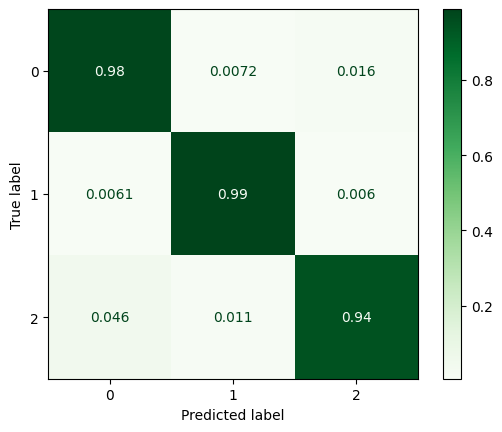

In [79]:
print(classification_report(y_test, test_preds_KS))
ConfusionMatrixDisplay.from_predictions(y_test, test_preds_KS,normalize='true',cmap='Greens');

# 🥉 **Modeling using Random Forest Classifier Algorithm (Default)**

In [80]:
%%time

# Create amy 2nd Default model pipeline using Randome Forest algorithm
R_F = RandomForestClassifier(random_state = 42)
scaler = StandardScaler()
model_pipeRF = make_pipeline(scaler, R_F)

# Fit the modeling pipeline on the training data
model_pipeRF.fit(X_train, y_train)
y_pred_trainRF = model_pipeRF.predict(X_train) # Get predictions for the training data
y_pred_testRF = model_pipeRF.predict(X_test) # Get predictions for the testing data


# I would like to display the values of my default model's key hyperparameters to be tuned later on :)
# These values will help direct my choice of the ranges to put in GridsearchCV for tuning

print(f'- What is maximum depth of the random forest tree: {max([estimator.get_depth() for estimator in R_F.estimators_])}' '\n')
print(f'- What is the number of trees in the forest? {R_F.n_estimators}' '\n')
print(f'- What is the minimum number of samples required to be at a leaf node? {R_F.min_samples_leaf}' '\n')
print(f'- What is the min samples split of the forest? {R_F.min_samples_split}' '\n')

# Evaluate the model
train_RF_scores = evaluate_classification(y_train, y_pred_trainRF, name='train')
test_RF_scores = evaluate_classification(y_test, y_pred_testRF, name='test')

pd.concat([train_K_scores, test_K_scores], axis=1)

- What is maximum depth of the random forest tree: 48

- What is the number of trees in the forest? 100

- What is the minimum number of samples required to be at a leaf node? 1

- What is the min samples split of the forest? 2

CPU times: user 1min 29s, sys: 124 ms, total: 1min 29s
Wall time: 1min 30s


,train,test
Accuracy,0.988,0.978
Recall,0.99,0.969
Precision,0.975,0.96
F1,0.982,0.964


              precision    recall  f1-score   support

           0       0.99      0.99      0.99     12989
           1       0.99      1.00      1.00      9385
           2       0.99      0.96      0.97      2626

    accuracy                           0.99     25000
   macro avg       0.99      0.98      0.99     25000
weighted avg       0.99      0.99      0.99     25000



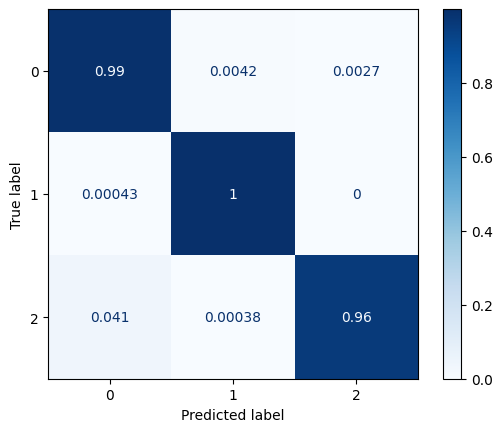

In [81]:
print(classification_report(y_test, y_pred_testRF))
ConfusionMatrixDisplay.from_predictions(y_test, y_pred_testRF, normalize='true', cmap='Blues');

# 🥈 **SMOTE on my Random Forest Classifer model**
**This step is performed for, potentially, better results as SMOTE is to minimize the impact caused by our imbalanced clases**

In [85]:
%%time

#Create model pipeline with scaler, SMOTE, and model
smote = SMOTE()
R_F_smote = RandomForestClassifier(random_state = 42)
R_F_smote_pipe = make_sampler_pipeline(scaler, smote, R_F_smote)
#Fit and evaluate the model pipeline
R_F_smote_pipe.fit(X_train, y_train)

train_preds_RFS = R_F_smote_pipe.predict(X_train)
test_preds_RFS = R_F_smote_pipe.predict(X_test)

print(f'- What is maximum depth of the random forest tree: {max([estimator.get_depth() for estimator in R_F.estimators_])}' '\n')
print(f'- What is the number of trees in the forest? {R_F.n_estimators}' '\n')
print(f'- What is the minimum number of samples required to be at a leaf node? {R_F.min_samples_leaf}' '\n')
print(f'- What is the min samples split of the forest? {R_F.min_samples_split}' '\n')

# Evaluate the model
train_RF_scores = evaluate_classification(y_train, train_preds_RFS, name='train')
test_RF_scores = evaluate_classification(y_test, test_preds_RFS, name='test')

pd.concat([train_K_scores, test_K_scores], axis=1)

- What is maximum depth of the random forest tree: 48

- What is the number of trees in the forest? 100

- What is the minimum number of samples required to be at a leaf node? 1

- What is the min samples split of the forest? 2

CPU times: user 2min 7s, sys: 154 ms, total: 2min 7s
Wall time: 2min 8s


,train,test
Accuracy,0.988,0.978
Recall,0.99,0.969
Precision,0.975,0.96
F1,0.982,0.964


              precision    recall  f1-score   support

           0       0.99      0.99      0.99     12989
           1       0.99      1.00      1.00      9385
           2       0.98      0.96      0.97      2626

    accuracy                           0.99     25000
   macro avg       0.99      0.98      0.99     25000
weighted avg       0.99      0.99      0.99     25000



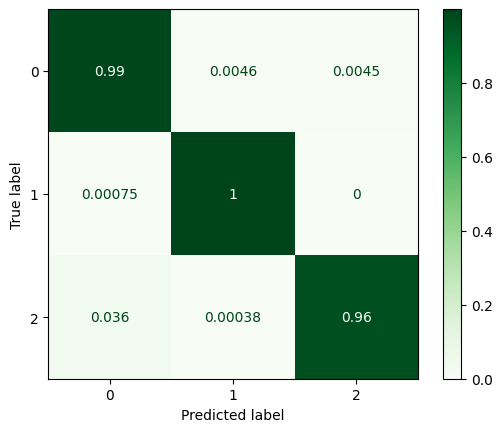

In [86]:
print(classification_report(y_test, test_preds_RFS))
ConfusionMatrixDisplay.from_predictions(y_test, test_preds_RFS,normalize='true',cmap='Greens');

# 🥉 **Modeling using Logistic Regression Algorithm (Default)**

In [91]:
%%time

#Create a baseline model pipeline
log_reg = LogisticRegression(max_iter=1000)
scaler = StandardScaler()
log_reg_pipe = make_pipeline(scaler, log_reg)

#Fit and evaluate the baseline model pipeline
log_reg_pipe.fit(X_train, y_train)
train_predsLR = log_reg_pipe.predict(X_train)
test_predsLR = log_reg_pipe.predict(X_test)

# I would like to display the values of my default model's key hyperparameters to be tuned later on :)
# These values will help direct my choice of the ranges to put in GridsearchCV for tuning


# Evaluate the model
train_LR_scores = evaluate_classification(y_train, train_predsLR, name='train')
test_LR_scores = evaluate_classification(y_test, test_predsLR, name='test')

pd.concat([train_K_scores, test_K_scores], axis=1)

CPU times: user 9.7 s, sys: 31.5 ms, total: 9.73 s
Wall time: 10.5 s


,train,test
Accuracy,0.988,0.978
Recall,0.99,0.969
Precision,0.975,0.96
F1,0.982,0.964


              precision    recall  f1-score   support

           0       0.99      0.99      0.99     12989
           1       0.99      1.00      0.99      9385
           2       0.98      0.96      0.97      2626

    accuracy                           0.99     25000
   macro avg       0.99      0.98      0.99     25000
weighted avg       0.99      0.99      0.99     25000



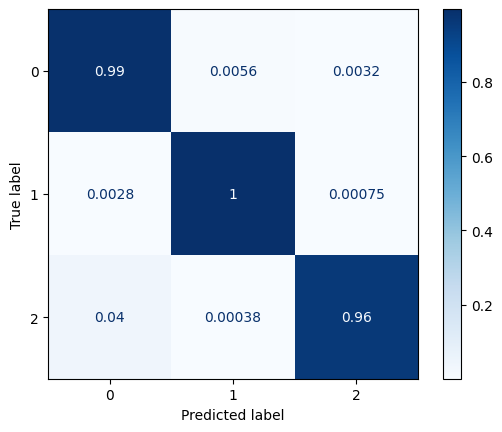

In [90]:
print(classification_report(y_test, test_predsLR))
ConfusionMatrixDisplay.from_predictions(y_test, test_predsLR, normalize='true', cmap='Blues');

# 🥈 **SMOTE on my Logistic Regression model**
**This step is performed for, potentially, better results as SMOTE is to minimize the impact caused by our imbalanced clases**

In [93]:
%%time

#Create model pipeline with scaler, SMOTE, and model
smote = SMOTE()
log_reg_smote = LogisticRegression(max_iter=1000)
log_reg_smote_pipe = make_sampler_pipeline(scaler, smote, log_reg_smote)
#Fit and evaluate the model pipeline
log_reg_smote_pipe.fit(X_train, y_train)

train_predsLRS = log_reg_smote_pipe.predict(X_train)
test_predsLRS = log_reg_smote_pipe.predict(X_test)


# Evaluate the model
train_K_scores = evaluate_classification(y_train, train_preds_K, name='train')
test_K_scores = evaluate_classification(y_test, test_preds_K, name='test')

pd.concat([train_K_scores, test_K_scores], axis=1)

CPU times: user 27.3 s, sys: 79.4 ms, total: 27.4 s
Wall time: 32.9 s


,train,test
Accuracy,0.986,0.982
Recall,0.97,0.963
Precision,0.987,0.983
F1,0.978,0.972


              precision    recall  f1-score   support

           0       0.99      0.99      0.99     12989
           1       0.99      1.00      0.99      9385
           2       0.96      0.97      0.97      2626

    accuracy                           0.99     25000
   macro avg       0.98      0.99      0.98     25000
weighted avg       0.99      0.99      0.99     25000



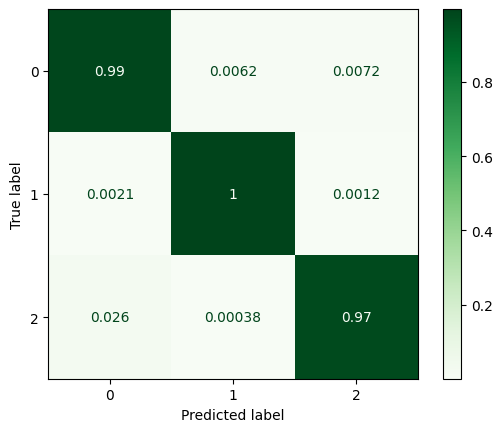

In [98]:
print(classification_report(y_test, test_predsLRS))
ConfusionMatrixDisplay.from_predictions(y_test, test_predsLRS, normalize='true', cmap='Greens');

# 🥉 **Default Modeling using XGBoost Algorithm (Default)**

In [92]:
%%time

#Create a baseline model pipeline
xgb = XGBClassifier()
xgb.fit(X_train, y_train)

#Fit and evaluate the baseline model pipeline
log_reg_pipe.fit(X_train, y_train)

train_predsXGB = log_reg_pipe.predict(X_train)
test_predsXGB = log_reg_pipe.predict(X_test)

# I would like to display the values of my default model's key hyperparameters to be tuned later on :)
# These values will help direct my choice of the ranges to put in GridsearchCV for tuning




# Evaluate the model
train_LR_scores = evaluate_classification(y_train, train_predsXGB, name='train')
test_LR_scores = evaluate_classification(y_test, test_predsXGB, name='test')

pd.concat([train_K_scores, test_K_scores], axis=1)

CPU times: user 4min 45s, sys: 511 ms, total: 4min 46s
Wall time: 3min 52s


,train,test
Accuracy,0.988,0.978
Recall,0.99,0.969
Precision,0.975,0.96
F1,0.982,0.964


              precision    recall  f1-score   support

           0       0.99      0.99      0.99     12989
           1       0.99      1.00      0.99      9385
           2       0.98      0.96      0.97      2626

    accuracy                           0.99     25000
   macro avg       0.99      0.98      0.99     25000
weighted avg       0.99      0.99      0.99     25000



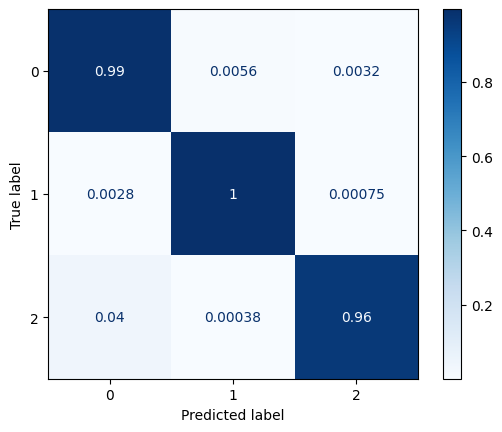

In [99]:
print(classification_report(y_test, test_predsXGB))
ConfusionMatrixDisplay.from_predictions(y_test, test_predsXGB, normalize='true', cmap='Blues');

# 🥈 **SMOTE on my XGBoost model**
**This step is performed for, potentially, better results as SMOTE is to minimize the impact caused by our imbalanced clases**

In [96]:
%%time

#Create model pipeline with scaler, SMOTE, and model
smote = SMOTE()
log_reg_smote = LogisticRegression(max_iter=1000)
log_reg_smote_pipe = make_sampler_pipeline(scaler, smote, log_reg_smote)
#Fit and evaluate the model pipeline
log_reg_smote_pipe.fit(X_train, y_train)

train_predsXGBS = log_reg_smote_pipe.predict(X_train)
test_predsXGBS = log_reg_smote_pipe.predict(X_test)



# Evaluate the model
train_LR_scores = evaluate_classification(y_train, train_predsXGB, name='train')
test_LR_scores = evaluate_classification(y_test, test_predsXGB, name='test')

pd.concat([train_K_scores, test_K_scores], axis=1)

CPU times: user 25.2 s, sys: 94.8 ms, total: 25.3 s
Wall time: 23.9 s


,train,test
Accuracy,0.986,0.982
Recall,0.97,0.963
Precision,0.987,0.983
F1,0.978,0.972


              precision    recall  f1-score   support

           0       0.99      0.99      0.99     12989
           1       0.99      1.00      0.99      9385
           2       0.96      0.97      0.97      2626

    accuracy                           0.99     25000
   macro avg       0.98      0.99      0.98     25000
weighted avg       0.99      0.99      0.99     25000



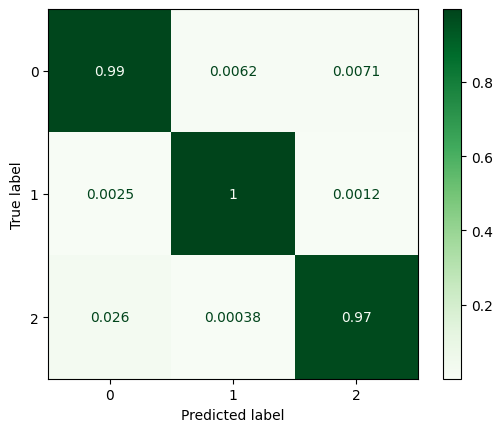

In [97]:
print(classification_report(y_test, test_predsXGBS))
ConfusionMatrixDisplay.from_predictions(y_test, test_predsXGBS, normalize='true', cmap='Greens');

# 💪 **Tunning my models' hyperparameters using GridseachCV**

# 🥇 **Modeling using my Tunned k-nearest neighbors (KNN) Algorithm**



# 🥇 **Modeling using my Tunned Random Forest Classifier Algorithm**

# 🥇 **Modeling using my Tunned Logistic Regression Algorithm**

# 🥇 **Modeling using my Tunned XGBoost Algorithm**